<a href="https://colab.research.google.com/github/RizkyaSalsabila/eda-data-jobs/blob/main/eda_data_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#=== Analisis Jobs and Salaries in Data Science ===
#============= By : Rizkya Salsabila ==============

#--- Import Library ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#--- Upload dan Baca file ---
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("jobs_in_data.csv")
df.head()

#--- Cek Info ---
df.info()
df.describe()

#--- Perhitungan ---
print("\nINFORMASI")
print("> Rata - rata Gaji : ", df['salary_in_usd'].mean())
print("> Gaji Tertinggi : ", df['salary_in_usd'].max())
print("> Gaji Terendah : ", df['salary_in_usd'].min())
print("------------------------------------\n")

Saving jobs_in_data.csv to jobs_in_data (21).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB

INFORMASI
> Rata - rata Gaji :  150299.4955638696
> Gaji Tertinggi :  450000
> Gaji Terendah :  15000
-----------------

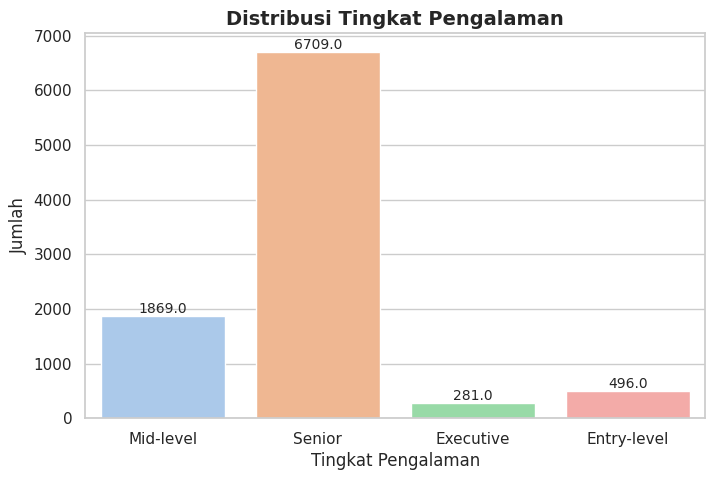

In [27]:
#--- Visualisasi 1 ---
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")[:4]
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='experience_level', palette=palette, hue='experience_level', legend=False)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# > Menambahkan judul dan label sumbu
plt.title("Distribusi Tingkat Pengalaman", fontsize=14, weight='bold')
plt.xlabel("Tingkat Pengalaman", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.show()

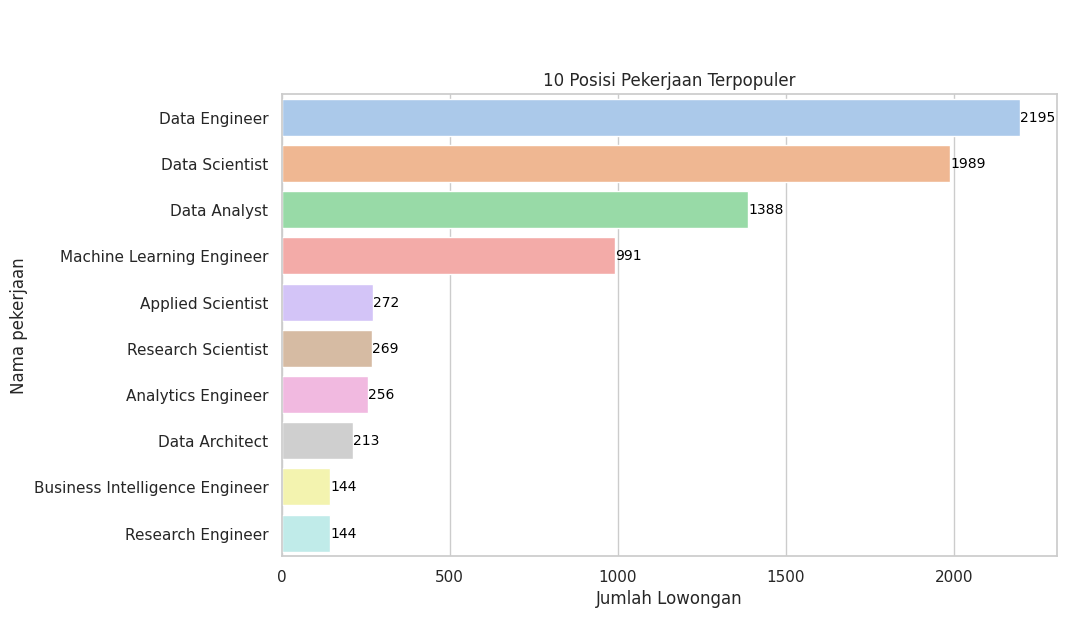

In [24]:
#--- Visualisasi 2 ---
plt.figure(figsize=(10,6))
top_jobs = df['job_title'].value_counts().head(10)

#> Buat grafik dan simpak ke variabel ax
ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="pastel", hue=top_jobs.index, legend=False)

# > Menambahkan label jumlah di setiap nama pekerjaan
for i, v in enumerate(top_jobs.values):
  ax.text(v+1, i, str(v), color='black', va='center', fontsize=10)

# > Menambahkan judul dan label sumbu
plt.title("\n\n\n10 Posisi Pekerjaan Terpopuler")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Nama pekerjaan")
plt.show()

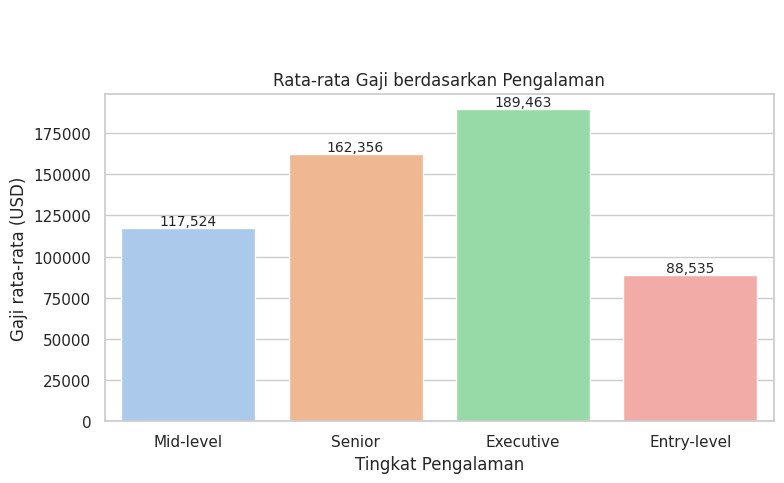

In [25]:
#--- Visualisasi 3 ---
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='experience_level', y='salary_in_usd', palette='pastel', estimator='mean', hue='experience_level', legend=False, errorbar=None)

# > Menambahkan label angka di setiap bar
for p in ax.patches:
  salary = p.get_height()
  ax.annotate(
      f'{salary:,.0f}',
      (p.get_x() + p.get_width()/2., salary),
      ha='center', va='bottom', fontsize=10
  )

#> Menambahkan judul dan label sumbu
plt.title("\n\n\nRata-rata Gaji berdasarkan Pengalaman")
plt.xlabel("Tingkat Pengalaman")
plt.ylabel("Gaji rata-rata (USD)")
plt.tight_layout()
plt.show()